# _Phishing Detector with Logistic Regression_
***
<b>DESCRIPTION</b>

<b>Background of Problem Statement :</b>

You are expected to write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data. You have to use one or more of the classification algorithms to train a model on the phishing website dataset.

<b>Problem Objective :</b>

The dataset is a text file which provides the following resources that can be used as inputs for model building :

 A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).
The code template containing these code blocks:
Import modules (Part 1)
Load data function + input/output field descriptions
The dataset also serves as an input for project scoping and tries to specify the functional and non-functional requirements for it.

<b>Domain: Cyber Security and Web Mining</b>

<b>Questions to be answered with analysis :</b>

Write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data.
Use one or more of the classification algorithms to train a model on the phishing website dataset.
Analysis Tasks to be performed:

<b>Initiation :</b>
Begin by creating a new ipynb file and load the dataset in it.


<b>Exercise 1 :</b>
Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 
Use 70% of data as training data and the remaining 30% as test data.                                                                                                                                                                          [ Hint: Use Scikit-Learn library LogisticRegression ]                                                                                                                                                                                                    [ Hint: Refer to the logistic regression tutorial taught earlier in the course ]
Print count of misclassified samples in the test data prediction as well as the accuracy score of the model. 
 

<b>Exercise 2 :</b>
Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
Check accuracy using the test data and compare the accuracy with the previous value.
Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

In [1]:
#Ensure the right versions and environment are being used
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= '0.20'

In [2]:
#commmon imports
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']= 12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
#read the input files 
with open('phishing.txt') as file:
    text = file.readlines()
    print(text[:5])


['-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1\n', '1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1\n', '1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1\n', '1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1\n', '1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1\n']


_So the file does not contain any headers but only the features. As per the problem definition, the header list is given as a separate list_

In [4]:
#create a list of columns
columns = [ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]

In [5]:
#read the file contents and convert to a dataframe
site = pd.read_csv('phishing.txt',names=columns,delimiter=',',engine='python')

In [6]:
site.head(2)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1


In [7]:
#check info .. 
site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol@              11055 non-null  int64
 4   Redirecting//        11055 non-null  int64
 5   PrefixSuffix-        11055 non-null  int64
 6   SubDomains           11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

_All the features are of integer data type and there are no null values in the dataset. It can be confirmed explicitly as well_

In [8]:
#check for null values
site.isna().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

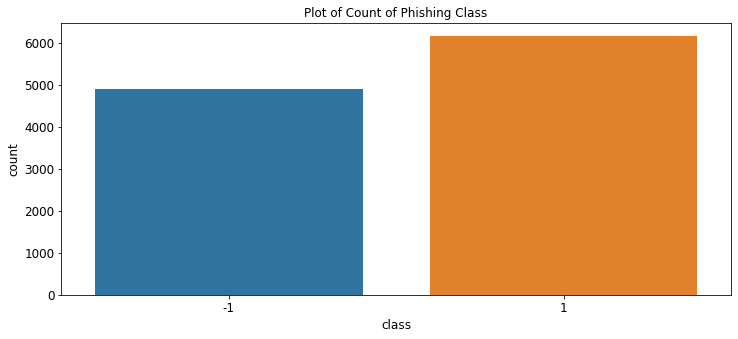

In [9]:
#check for class 
sns.countplot(site['class'])
plt.title('Plot of Count of Phishing Class')
plt.show()

_The dataset is evenly balanced with respect to whether the website is a phishing website or a non fishing website. Still splitting the data to have a similar representative in train and test set would be a better approach for modeling_

In [10]:
#check the variance of all the features .. 
import statistics
rem_col = []
for col in site.columns:
    var = statistics.variance(site[col])
    if var == 0:
        print(f'{col} has 0 variance and should be removed.')
        rem_col.append(col)
    else:
        print(f'{col}, VAR:{round(var,2)}')
        continue
print(f'Columns to be removed are {rem_col}')

UsingIP, VAR:0.9
LongURL, VAR:0.59
ShortURL, VAR:0.45
Symbol@, VAR:0.51
Redirecting//, VAR:0.45
PrefixSuffix-, VAR:0.46
SubDomains, VAR:0.67
HTTPS, VAR:0.83
DomainRegLen, VAR:0.89
Favicon, VAR:0.6
NonStdPort, VAR:0.47
HTTPSDomainURL, VAR:0.54
RequestURL, VAR:0.97
AnchorURL, VAR:0.51
LinksInScriptTags, VAR:0.58
ServerFormHandler, VAR:0.58
InfoEmail, VAR:0.6
AbnormalURL, VAR:0.5
WebsiteForwarding, VAR:0.1
StatusBarCust, VAR:0.42
DisableRightClick, VAR:0.16
UsingPopupWindow, VAR:0.62
IframeRedirection, VAR:0.33
AgeofDomain, VAR:1.0
DNSRecording, VAR:0.86
WebsiteTraffic, VAR:0.69
PageRank, VAR:0.77
GoogleIndex, VAR:0.48
LinksPointingToPage, VAR:0.32
StatsReport, VAR:0.48
class, VAR:0.99
Columns to be removed are []


_There are no features which have zero variance and at first glance there is no need to directly drop any of the features. The variance of all the features are quite signinficant except for website forwarding and disable right click features_

In [11]:
#check for correlation
site.corr(method='spearman')['class'].sort_values(ascending=False)

class                  1.000000
HTTPS                  0.735814
AnchorURL              0.701207
WebsiteTraffic         0.365118
PrefixSuffix-          0.348606
SubDomains             0.304692
RequestURL             0.253372
LinksInScriptTags      0.250711
ServerFormHandler      0.219190
GoogleIndex            0.128950
AgeofDomain            0.121496
PageRank               0.104645
UsingIP                0.094160
StatsReport            0.079857
DNSRecording           0.075718
LongURL                0.053332
Symbol@                0.052948
StatusBarCust          0.041838
LinksPointingToPage    0.041085
NonStdPort             0.036419
InfoEmail              0.018249
DisableRightClick      0.012653
UsingPopupWindow       0.000086
Favicon               -0.000280
IframeRedirection     -0.003394
WebsiteForwarding     -0.020113
Redirecting//         -0.038608
HTTPSDomainURL        -0.039854
AbnormalURL           -0.060488
ShortURL              -0.067966
DomainRegLen          -0.225789
Name: cl

_using popup window has the least correlation (near zero) with the class of the website. At the same time there are many features which have less than 10% correlation with the target variable class_

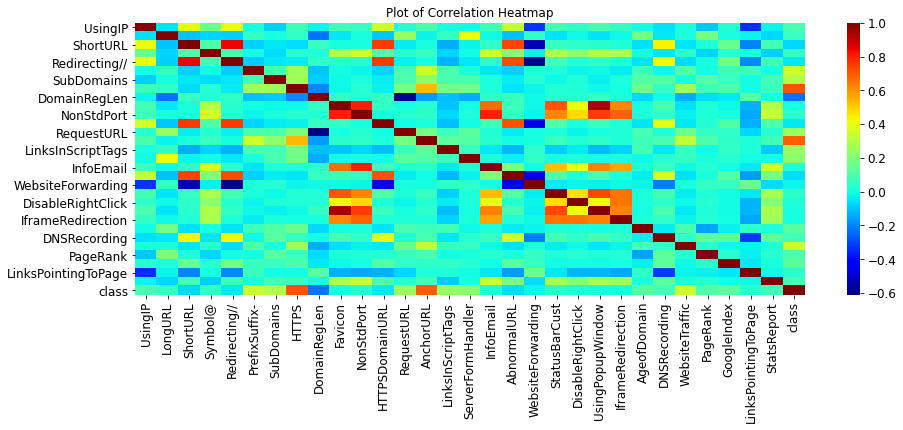

In [12]:
#correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(site.corr(),cmap=plt.get_cmap('jet'))
plt.title('Plot of Correlation Heatmap')
plt.show()

_There does not appear to be too high multicollinearity between the features. These can be handled by dimensionality reduction techniques like PCA, Kernel PCA or Incremental PCA. for example redirection and domain seems to have high correlation_

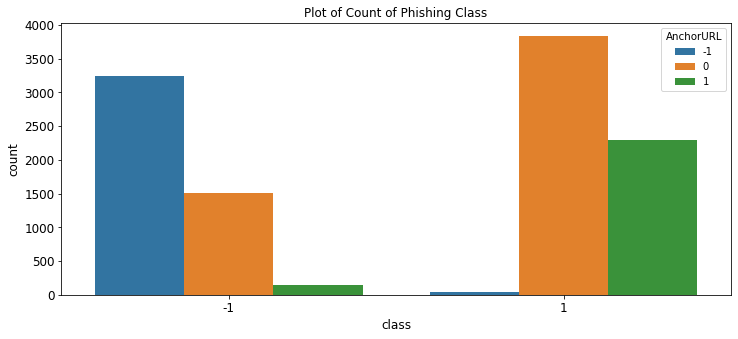

In [13]:
#check for class 
sns.countplot(site['class'],hue=site['AnchorURL'])
plt.title('Plot of Count of Phishing Class')
plt.show()

_when the anchor url is -1, there is a very high likelihood that the site class is -1. Similarly, when the anchor url is 0 then there is higher probability that the site class is 1_

In [14]:
#list the features where the correlation with class is less than 20% 
drop_features = []
for col in site.columns:
    corr = abs(site[col].corr(site['class']))
    if corr < 0.20:
        drop_features.append(col)
    else:
        continue
print('Features with less than 20% correlation:\n {}'.format(drop_features))        

Features with less than 20% correlation:
 ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport']


In [15]:
#drop the less correlated features from the dataset
site.drop(drop_features,axis=1,inplace=True)

In [16]:
site.head(2)

,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,WebsiteTraffic,class
0,-1,-1,-1,-1,1,-1,1,-1,-1,-1
1,-1,0,1,-1,1,0,-1,-1,0,-1


In [17]:
site.corr()['class']

PrefixSuffix-        0.348606
SubDomains           0.298323
HTTPS                0.714741
DomainRegLen        -0.225789
RequestURL           0.253372
AnchorURL            0.692935
LinksInScriptTags    0.248229
ServerFormHandler    0.221419
WebsiteTraffic       0.346103
class                1.000000
Name: class, dtype: float64

In [18]:
site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PrefixSuffix-      11055 non-null  int64
 1   SubDomains         11055 non-null  int64
 2   HTTPS              11055 non-null  int64
 3   DomainRegLen       11055 non-null  int64
 4   RequestURL         11055 non-null  int64
 5   AnchorURL          11055 non-null  int64
 6   LinksInScriptTags  11055 non-null  int64
 7   ServerFormHandler  11055 non-null  int64
 8   WebsiteTraffic     11055 non-null  int64
 9   class              11055 non-null  int64
dtypes: int64(10)
memory usage: 863.8 KB


_The number of features has rediced drastically from 30 feature columns to only 9 features_

## _Split the dataset_

In [19]:
#import libraries
from sklearn.model_selection import train_test_split
seed = 42
size = 0.30
train_set,test_set = train_test_split(site,random_state=seed,test_size=size,stratify=site['class'])

In [20]:
train_set.shape, test_set.shape

((7738, 10), (3317, 10))

In [21]:
#create the X_train and X_test 
X_train = train_set.drop('class',axis=1)
y_train = train_set['class']

X_test = test_set.drop('class',axis=1)
y_test = test_set['class']

## _Data Preparation for Modeling_

In [22]:
#Power transformation of the input features
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [23]:
#scale the input features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

_As a number of features have been dropped already, first build the model using all the features. Depending on the performance metric, dimensionality reduction can also be applied which may or may not improve the model score_

## _Modeling_

In [24]:
#import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [25]:
#define a function to run cross validation across models 
def cross_validate(X = X_train,y = y_train):
    '''This function will run cross validation on multiple models and will print the mean RMSE
       score and the standard deviation.'''
    
    seed = 42
    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('Logistic Regression',LogisticRegression(C=100.0)))
    models.append(('Naive Bayes',MultinomialNB()))
    models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
    models.append(('SVM Classifier',SVC()))
    models.append(('Random Forest',RandomForestClassifier()))
    models.append(('Gradient Boost',GradientBoostingClassifier()))
    models.append(('XGBoost Classifier',XGBRFClassifier()))
        
    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:        
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=seed,n_repeats=10)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        print (f' Model: {name} ,Accuracy:{(np.mean(cv_results))}') 

In [ ]:
#check the accuracy across the different models using cross validation
cross_validate(X_train,y_train)

 Model: Logistic Regression ,Accuracy:0.9217109753936975
 Model: Naive Bayes ,Accuracy:nan
 Model: Decision Tree Classifier ,Accuracy:0.938886298223974
 Model: SVM Classifier ,Accuracy:0.9327341208954675
 Model: Random Forest ,Accuracy:0.9403078044198413
 Model: Gradient Boost ,Accuracy:0.9380586559964699


_Based on cross validation score on accuracy, Random Forest Model has the highest accuracy. The simple linear model Logistic Regression also has a decent accuracy of over 92%. As part of the excercise description, further training and model tuning is to be done with Logistic Regression._

In [ ]:
#selected models -- > Logistic Regression as per the assignment instruction 
model_1 = LogisticRegression(C=100.0,random_state=seed)

In [ ]:
#train and predict with logistic regression
model_1.fit(X_train,y_train)
train_predict = model_1.predict(X_train)
test_predict = model_1.predict(X_test)

In [ ]:
#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [ ]:
print('Logistic Regression - Train Data Performance Metric')
print('\n')
print(classification_report(y_train,train_predict))
plot_confusion_matrix(model_1,X_train,y_train)
plt.show()

In [ ]:
print('Logistic Regression - Test Data Performance Metric')
print('\n')
print(classification_report(y_test,test_predict))
plot_confusion_matrix(model_1,X_test,y_test)
plt.show()

<font color = blue> <b> _Considering that class label of 1 means that the website is a Phishing website, then the model should have a very high recall value to identify all the phishing websites. It would mean that the precision of identifying the 1's will be less. But this would be desirable, as we won't like to missing out on a phising website and classify it as a non phishing website. On the other hand, it is still acceptable that a few of the geneuine websites get classified as phishing website. This can be improved further by collecting the user data on those websites and retraining the model post deployment_ </b> </font>

In [ ]:
#get the predicted values based on cross validation on the training data .. 
y_train_scores = cross_val_predict(model_1,X_train,y_train,cv=5,method='decision_function')

In [ ]:
#retrieve the precisions,recalls and the thresholds
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train,y_train_scores)

In [ ]:
#plot the precision recall curve
def plot_precision_recall_curve(precisions,recalls,thresholds):
    plt.figure(figsize=(12,5))
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.axis([-6,25,0,1.2])
    plt.title('Plot of Precision vs Recall - Logistic Regression')
    plt.legend()
    plt.grid()
    plt.xlabel('Thresholds')
    

In [ ]:
#plot the precision vs the recall curve with threshold 
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.show()

_Between the thresholds of -5 and -1, the recall is easily close to 100% or atleast much higher than 94%. The precision around these recalls is lesser than slightly or near to 80% which would be lower than the 92% precision value that we got earlier and reported in the classiffication report._

<b>_To improve or increase the recall, the threshold has to be decreased_</b>

In [ ]:
#Precision vs recall 
plt.plot(precisions,recalls)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision vs Recall')
plt.grid()
plt.show()

In [ ]:
#select the threshold value which will give higher recall of 99%
threshold_100_recall = thresholds[np.argmin(recalls>=0.999)]
print('Threshold value to use to improve the recall to minimum 99%')
print(f'Recommended Threshold Value:{threshold_100_recall}')

In [ ]:
#replot the precision recall curve with the threshold value clearly shown
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.vlines(x=threshold_100_recall,ymin=0,ymax=1.01)
plt.show()

In [ ]:
y_train_scores

In [ ]:
#adjusting the predictions based on the threshold to increase the recall score 
for i in range(len(X_train)):
    if y_train_scores[i] <= threshold_100_recall:
        train_predict[i] = -1
    else:
        train_predict[i] = 1

In [ ]:
recall_score(y_train,train_predict)

In [ ]:
precision_score(y_train,train_predict)

In [ ]:
print('Classification Report - Train Data [Adjusting for higher recall]')
print('Note - Recall has increased to near 100% for class label 1')
print('\n')

print(classification_report(y_train,train_predict))
print(confusion_matrix(y_train,train_predict))

In [ ]:
#predict the label for the test dataset -- > retrieve the decision score using the model
y_test_scores = model_1.decision_function(X_test)

In [ ]:
#check the decision scores of the X_test
y_test_scores

In [ ]:
#adjusting the predictions based on the threshold decided during training with training data 
for i in range(len(X_test)):
    if y_test_scores[i] <= threshold_100_recall:
        test_predict[i] = -1
    else:
        test_predict[i] = 1

In [ ]:
print('Classification Report - Test Data')
print('Note - Recall has increased to near 100% for class label 1')
print('\n')

print(classification_report(y_test,test_predict))
print(confusion_matrix(y_test,test_predict))

<font color = blue> <b> _There is only one website which is 1 but gets predicted as -1_ </b> </font>

## _Logistic Regresion with only 2 features_
- parameter Prefix_Suffix 
- URL_of_Anchor


In [ ]:
data = site[['PrefixSuffix-','AnchorURL','class']]

In [ ]:
data.head(2)

In [ ]:
X = data.drop('class',axis=1)
y = data['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=seed,test_size=size)
X_train.shape, X_test.shape

In [ ]:
model_1.fit(X_train,y_train)
train_predict = model_1.predict(X_train)
test_predict = model_1.predict(X_test)
print('Classification Report- Train Data')
print(classification_report(y_train,train_predict))
print('Classification Report- Test Data')
print(classification_report(y_test,test_predict))

In [ ]:
plot_confusion_matrix(model_1,X_test,y_test)
plt.title('Logistic Regression with only PrefixSuffix & AnchorURL')
plt.show()

<b> Short Summary </b>_Training with just two features PrefixSuffix- and AnchorURL provides a recall score of 100% both on the train and test dataset. This also proves the importance of feature selection and feature engineering. Perhaps dimensionality reduction would have been able to spot these two features. However, steps to fine tune the simple logistic regression to achieve 100% recall using the decision scores is an awesome learning experience._